<a href="https://colab.research.google.com/github/Glamorous9754/Practice-in-Jupyter/blob/main/Classification%20Decision%20Tree%20Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [1]:
import pandas as pd

# Use the 'raw' URL to access the raw CSV data
url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/heart_disease_classification_dataset.csv'
df = pd.read_csv(url)

# Missing Data Imputation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [3]:
print(df['trestbps'].mean())
print(df['chol'].mean())
print(df['thalach'].mean())

131.7123745819398
246.31788079470198
149.86577181208054


In [4]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalach'] = df['thalach'].fillna(df['thalach'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


# Creation of Dummy Variable

In [5]:
df =pd.get_dummies(df,columns=['sex'],drop_first=True)

In [6]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes,True
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes,True
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes,False
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes,True
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes,False


# Dependent(y) and Independent(x) Variable Creation

In [7]:
x = df.loc[:,df.columns != "target"]
y = df['target']

# Train - Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree Classification model

### Training Classification Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

clfTree = DecisionTreeClassifier(max_depth=3)
clfTree.fit(x_train, y_train)

# Predict on test data
y_train_pred = clfTree.predict(x_train)
y_test_pred = clfTree.predict(x_test)

### Model Performance

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print('Confusion Matrix for training data: \n',confusion_matrix(y_train, y_train_pred))
print('\n Confusion Matrix for training data: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score for test data: ',accuracy_score(y_test, y_test_pred))
# print('\n Classification Report for test data: \n',classification_report(y_test, y_test_pred))

Confusion Matrix for training data: 
 [[ 92  19]
 [ 18 113]]

 Confusion Matrix for training data: 
 [[21  6]
 [ 8 26]]
Accuracy Score for test data:  0.7704918032786885


### Ploting Decision Tree

In [33]:
# pip install pydotplus

In [34]:
from sklearn import tree
from IPython.display import Image
import pydotplus


dot_data = tree.export_graphviz(clfTree, out_file=None,feature_names= x_train.columns, filled = True)

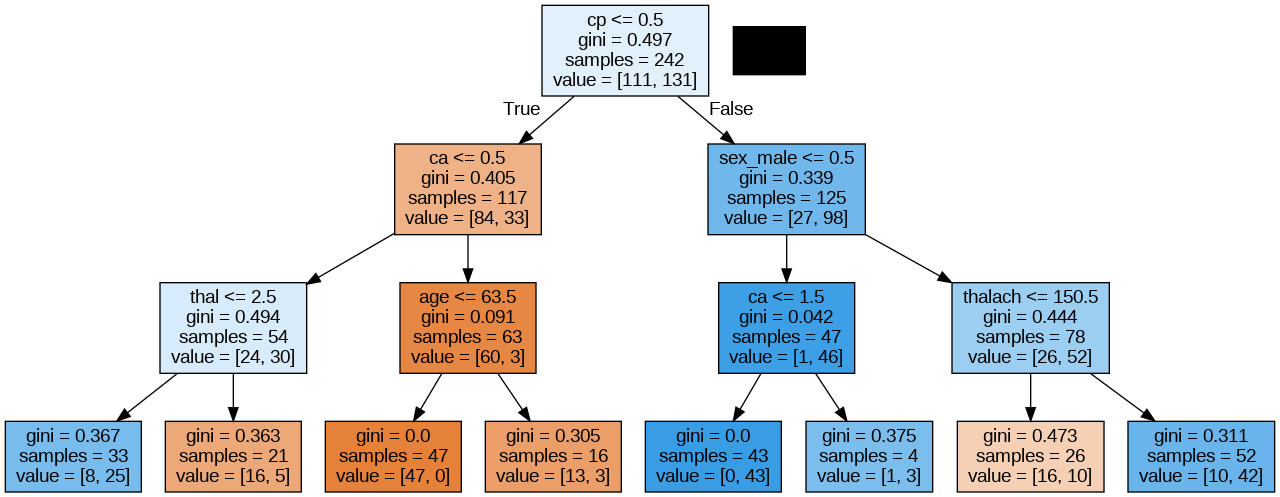

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

### Maximum number of levels in tree

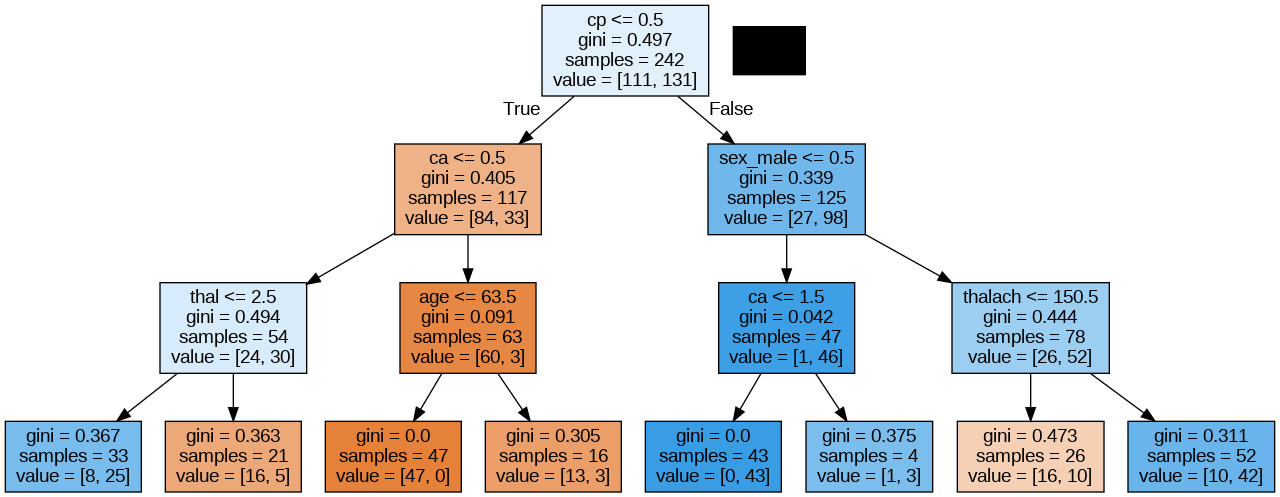

In [36]:
clfTree1 = tree.DecisionTreeClassifier(max_depth = 3)
clfTree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree1, out_file=None,feature_names= x_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [37]:
accuracy_score(y_test, clfTree1.predict(x_test))

0.7704918032786885

### Minimum observations at internal node

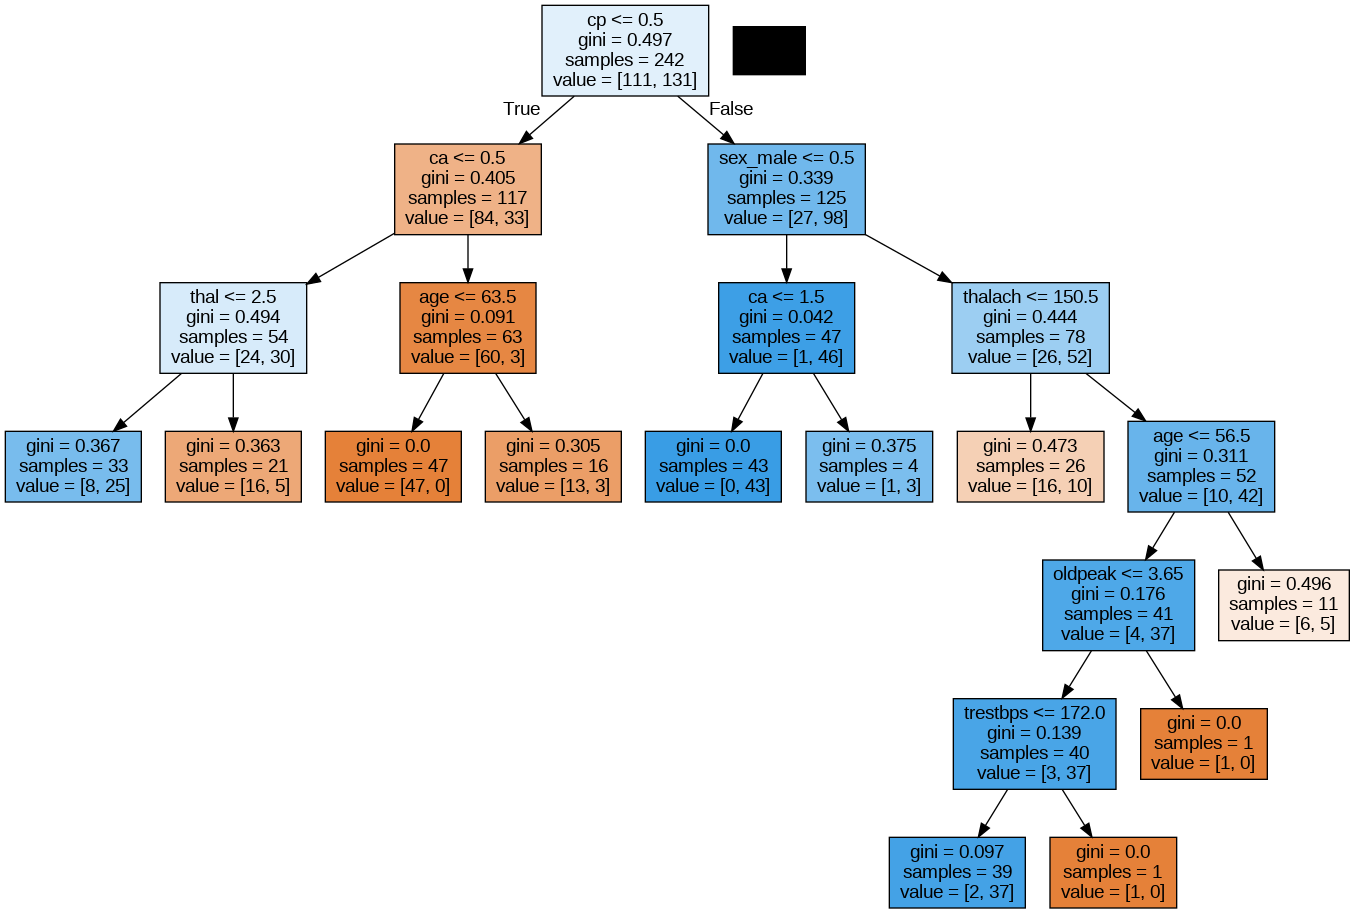

In [38]:
clfTree2 = tree.DecisionTreeClassifier(min_samples_split = 40)
clfTree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [39]:
accuracy_score(y_test, clfTree2.predict(x_test))

0.7540983606557377

### Minimum observations at leaf node

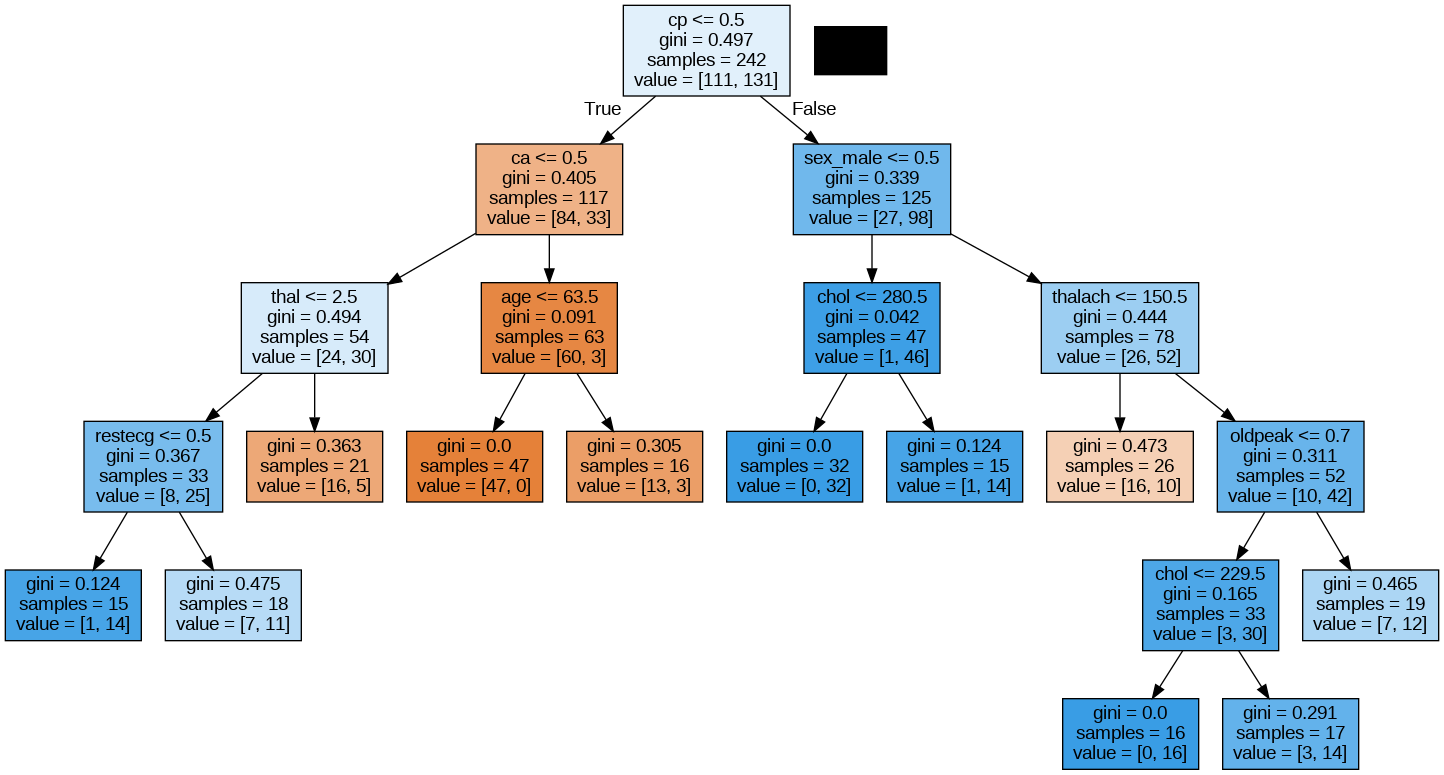

In [40]:
clfTree3 = tree.DecisionTreeClassifier(min_samples_leaf = 15, max_depth=7)
clfTree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree3, out_file=None,feature_names= x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [41]:
accuracy_score(y_test, clfTree3.predict(x_test))

0.7704918032786885

## Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier

clf_tree = DecisionTreeClassifier()
bagTree = BaggingClassifier(estimator=clf_tree,n_estimators=1000, random_state=0)
bagTree.fit(x_train, y_train)


print("Confusion Matrix:\n",confusion_matrix(y_test,bagTree.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,bagTree.predict(x_test)))

Confusion Matrix:
 [[20  7]
 [ 4 30]]
Accuracy Score:  0.819672131147541


## Random Forest Model (RF)

In [12]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1, random_state=0)
rf_clf.fit(x_train,y_train)

print("Confusion Matrix:\n",confusion_matrix(y_test,rf_clf.predict(x_test)))

print("Accuracy Score: ",accuracy_score(y_test,rf_clf.predict(x_test)))

Confusion Matrix:
 [[22  5]
 [ 4 30]]
Accuracy Score:  0.8524590163934426
